<a href="https://colab.research.google.com/github/s-c-soma/Deeplearning-CMPE-258/blob/main/Assignment_1_%20Part_1/Assignment1_part1_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast AI setup

In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 5.6MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 194kB 18.0MB/s 
     |████████████████████████████████| 1.2MB 16.4MB/s 
     |████████████████████████████████| 61kB 6.6MB/s 
Mounted at /content/gdrive


In [3]:
#hide
from fastbook import *

#  1.cnn_learner for image classification

https://dlabs.ai/blog/introduction-to-deep-learning/

In [3]:
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.183678,0.027780,0.010825,38:24


epoch,train_loss,valid_loss,error_rate,time
0,0.067127,0.009627,0.003383,53:54


https://colab.research.google.com/github/fastai/fastai/blob/master/nbs/quick_start.ipynb#scrollTo=IlRUGfI5taxQ

https://colab.research.google.com/github/hduongck/AI-ML-Learning/blob/master/2019%20Fastai%20Deep%20Learning/2019_Deep_Learning_3_NLP_tutorials_ULMFiT.ipynb#scrollTo=KDSiiW-cxHbr

# 2.unet_learner for segmentation

### Computer vision segmentation

Here is how we can train a segmentation model with fastai, using a subset of the [*Camvid* dataset](http://www0.cs.ucl.ac.uk/staff/G.Brostow/papers/Brostow_2009-PRL.pdf):

In [9]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.871090,2.515093,01:15


epoch,train_loss,valid_loss,time
0,2.042069,1.611318,01:23
1,1.702882,1.258021,01:21
2,1.535202,1.213068,01:20
3,1.410921,1.216932,01:21
4,1.295941,0.924932,01:21
5,1.174076,0.823129,01:20
6,1.069050,0.804364,01:21
7,0.984647,0.789195,01:21


We can visualize how well it achieved its task, by asking the model to color-code each pixel of an image.

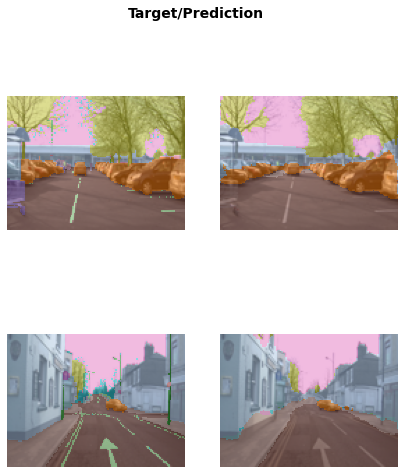

In [10]:
learn.show_results(max_n=6, figsize=(7,8))

Or we can plot the `k` instances that contributed the most to the validation loss by using the `SegmentationInterpretation` class.

In [11]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=2)

NameError: ignored

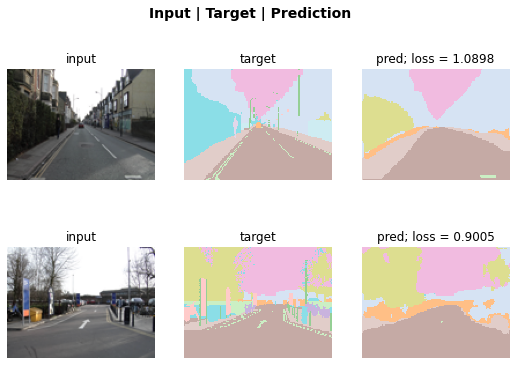

In [ ]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=2)

# 3.text_classifier_learner for sentiment analysis

## Natural language processing

Here is all of the code necessary to train a model that can classify the sentiment of a movie review better than anything that existed in the world just five years ago:

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(2, 1e-2)

epoch,train_loss,valid_loss,accuracy,time


Predictions are done with `predict`, as for computer vision:

In [ ]:
learn.predict("I really liked that movie!")

# 4.tabular_learner for decisiontree

https://github.com/fastai/fastbook/blob/master/09_tabular.ipynb

## Tabular

Building models from plain *tabular* data is done using the same basic steps as the previous models. Here is the code necessary to train a model that will predict whether a person is a high-income earner, based on their socioeconomic background:

In [ ]:
from fastai2.tabular.all import *

path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(2)

# 5.collab_learner for ranking

## Recommendation systems

Recommendation systems are very important, particularly in e-commerce. Companies like Amazon and Netflix try hard to recommend products or movies that users might like. Here's how to train a model that will predict movies people might like, based on their previous viewing habits, using the [MovieLens dataset](https://doi.org/10.1145/2827872):

In [ ]:
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(6)

We can use the same `show_results` call we saw earlier to view a few examples of user and movie IDs, actual ratings, and predictions:

In [ ]:
learn.show_results()